<a href="https://colab.research.google.com/github/nehad-ahm/learn-neural-networks/blob/main/mnist_plain_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

The following block of code imports the dataset and initialises them to arrays. Each picture in the dataset is an image of a handwritten number of 28x28 pixels each.

In [75]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Lets look at a few of the images from the set for example

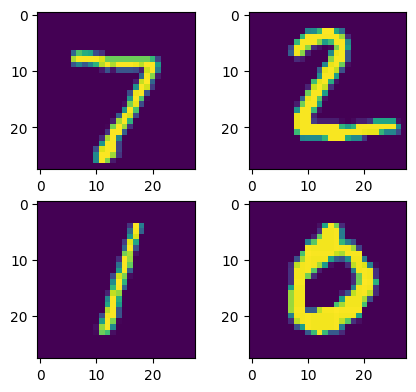

In [76]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5,4.5))
axs = axs.flatten()
for i in np.arange(len(axs)):
  ax = axs[i]
  ax.imshow(x_test[i])

As you can see, each pixel is associated with a value between 0 to 255 since the images are grayscale. We can normalise the values because why not?

In [77]:
x_train = x_train/255
x_test = x_test/255

We now build the neural network in the following block with 256 units in the first layer and 128 in the second layer as suggested by the ISL book

In [78]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
#Training the model and storing training history
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8724 - loss: 0.4159 - val_accuracy: 0.9624 - val_loss: 0.1257
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9687 - loss: 0.1002 - val_accuracy: 0.9615 - val_loss: 0.1247
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9789 - loss: 0.0631 - val_accuracy: 0.9680 - val_loss: 0.1109
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9848 - loss: 0.0482 - val_accuracy: 0.9746 - val_loss: 0.0884
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9718 - val_loss: 0.1077
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9894 - loss: 0.0317 - val_accuracy: 0.9718 - val_loss: 0.1116
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9692 - val_loss: 0.1254
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9919 - loss: 0.0245

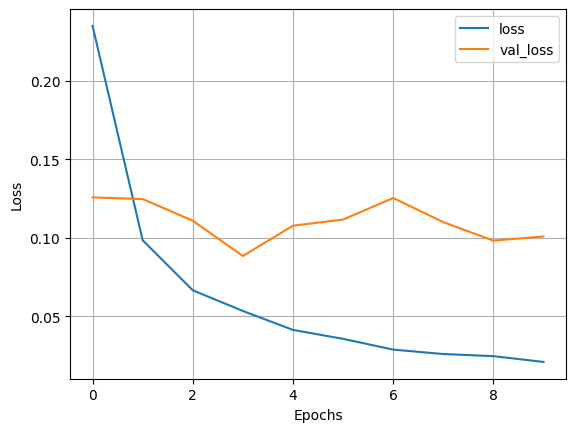

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

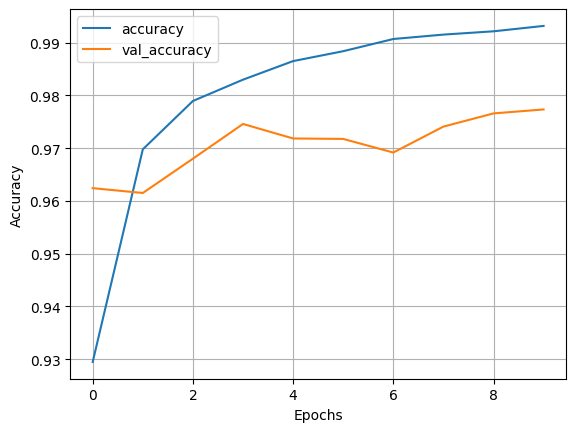

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [82]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [83]:
count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count += 1

print('Percentage of test set correctly categorised:', 100*count/len(y_pred))

Percentage of test set correctly categorised: 97.82


Testing the built model on my handwritten numbers

In [96]:
os

AttributeError: module 'os' has no attribute 'removedir'

In [100]:
from PIL import Image
img = []

path_to_images = '/content/learn-neural-networks/my-numbers-handwritten'

for i in np.arange(1,17):
  image = Image.open(f'{path_to_images}/test_numbers_{i:02}.png')
  image = image.resize((28,28))
  image = image.convert('L')
  image.save(f'{path_to_images}/test_numbers_{i:02}.png')
  img.append(np.asarray(image)/256)

In [101]:
img = 1 - np.asarray(img)
for image in img:
  image = np.ndarray.flatten(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[8 6 2 3]
 [8 8 8 7]
 [8 8 8 3]
 [8 8 2 8]]


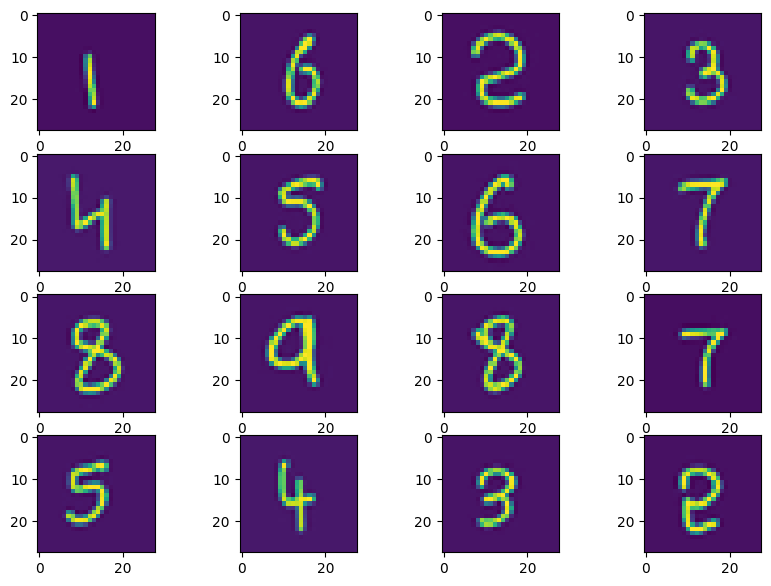

In [103]:
mypred = model.predict(img)
mypred = mypred.argmax(axis=1)
print(mypred.reshape(4,4))

fig, axs = plt.subplots(nrows=4, ncols = 4, figsize=(10,7))
axs = axs.flatten()
for i in np.arange(16):
  ax = axs[i]
  ax.imshow(img[i])
  #ax.title('Predicted:' + str(y_pred[i]))